In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

In [3]:
# %run "Dataset Processing.ipynb"

In [9]:
# Importing the dataset
dataset = pd.read_csv('I:/WAF with mechine learning/Dataset/DDos 2019 cic/01-12/DrDoS_DNSfinal.csv', sep=',')

In [5]:
# dataset = pd.read_csv('I:/WAF with mechine learning/Dataset/DDos 2019 cic/01-12/DrDoS_UDPfinal.csv', sep=',')

In [7]:
dataset

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
0,1217353,14,634,74,60495,17,0,28415,97,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1,973171,71,634,13,60495,17,1,2,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
2,1213250,14,634,74,46391,17,2,48549,200,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
3,1203225,14,634,74,11894,17,3,48337,200,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4,1207865,14,634,74,27878,17,4,32026,200,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912014,3293358,14,900,74,23579,17,4911987,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4912015,3298087,14,900,74,54596,17,4911988,30,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4912016,3291987,14,900,74,14341,17,4911989,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4912017,3296771,14,900,74,46229,17,4911990,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1


In [7]:
print(dataset.columns)

Index(['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
  

In [8]:
dataset.value_counts()

Flow ID  Source IP  Source Port  Destination IP  Destination Port  Protocol  Timestamp  Flow Duration  Total Fwd Packets  Total Backward Packets  Total Length of Fwd Packets  Total Length of Bwd Packets  Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  Bwd Packet Length Max  Bwd Packet Length Min  Bwd Packet Length Mean  Bwd Packet Length Std  Flow Bytes/s  Flow Packets/s  Flow IAT Mean  Flow IAT Std  Flow IAT Max  Flow IAT Min  Fwd IAT Total  Fwd IAT Mean  Fwd IAT Std   Fwd IAT Max  Fwd IAT Min  Bwd IAT Total  Bwd IAT Mean  Bwd IAT Std  Bwd IAT Max  Bwd IAT Min  Fwd PSH Flags  Bwd PSH Flags  Fwd URG Flags  Bwd URG Flags  Fwd Header Length  Bwd Header Length  Fwd Packets/s  Bwd Packets/s  Min Packet Length  Max Packet Length  Packet Length Mean  Packet Length Std  Packet Length Variance  FIN Flag Count  SYN Flag Count  RST Flag Count  PSH Flag Count  ACK Flag Count  URG Flag Count  CWE Flag Count  ECE Flag Count  Down/Up Ratio  Average Packet

In [10]:
dataset['Label'].value_counts()

Label
1    4908665
0       3354
Name: count, dtype: int64

In [11]:
data_new_20features_Xwithlabel = dataset[['Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Label']]


In [12]:
data_new_20features_Xwithlabel.head(1000)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Label
0,1217353,14,634,74,60495,17,0,28415,97,0,...,0.0,440.0,440.0,440.0,0.0,0.0,0.0,0.0,0.0,1
1,973171,71,634,13,60495,17,1,2,2,0,...,0.0,440.0,440.0,440.0,0.0,0.0,0.0,0.0,0.0,1
2,1213250,14,634,74,46391,17,2,48549,200,0,...,0.0,440.0,440.0,440.0,0.0,0.0,0.0,0.0,0.0,1
3,1203225,14,634,74,11894,17,3,48337,200,0,...,0.0,440.0,440.0,440.0,0.0,0.0,0.0,0.0,0.0,1
4,1207865,14,634,74,27878,17,4,32026,200,0,...,0.0,440.0,440.0,440.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1216797,14,634,74,58670,17,995,30765,200,0,...,0.0,440.0,440.0,440.0,0.0,0.0,0.0,0.0,0.0,1
996,1218020,14,634,74,62860,17,996,31150,200,0,...,0.0,440.0,440.0,440.0,0.0,0.0,0.0,0.0,0.0,1
997,1208438,14,634,74,29963,17,997,31292,200,0,...,0.0,440.0,440.0,440.0,0.0,0.0,0.0,0.0,0.0,1
998,1216376,14,634,74,57101,17,998,30940,200,0,...,0.0,440.0,440.0,440.0,0.0,0.0,0.0,0.0,0.0,1


In [13]:
data_new_20features_X = dataset[['Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std']]

In [14]:
data_new_20features_X.to_csv('I:/WAF with mechine learning/Dataset/DDos 2019 cic/01-12/DrDoS_DNSdata_new_20features_X.csv', index = False )

In [15]:
data_new_20features_X.value_counts()

Flow ID  Source IP  Source Port  Destination IP  Destination Port  Protocol  Timestamp  Flow Duration  Total Fwd Packets  Total Backward Packets  Total Length of Fwd Packets  Total Length of Bwd Packets  Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  Bwd Packet Length Max  Bwd Packet Length Min  Bwd Packet Length Mean  Bwd Packet Length Std
0        12         443          78              51597             6         4633753    228            1                  2                       0.0                          0.0                          0.0                    0.0                    0.0                     0.0                    0.0                    0.0                    0.0                     0.0                      1
2533551  14         803          74              14687             17        2555583    2              2                  0                       2944.0                       0.0                          1472.0       

In [16]:
dataset_y = dataset['Label']

In [17]:
dataset_y.value_counts()

Label
1    4908665
0       3354
Name: count, dtype: int64

In [18]:
dataset_y.to_csv('I:/WAF with mechine learning/Dataset/DDos 2019 cic/01-12/DrDoS_DNSlabel.csv')

In [18]:
dataset_y.head()

0    1
1    1
2    1
3    1
4    1
Name: Label, dtype: int64

In [19]:
dataset_y.value_counts()

Label
1    4908665
0       3354
Name: count, dtype: int64

Label Encoding for the Dataset

In [20]:
dataset.drop('Label', axis=1, inplace=True)

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_y_trans = le.fit_transform(dataset_y)
data_y_trans

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

Train Test Split Normal dataset 84 Features

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( dataset, data_y_trans, test_size = 0.30, random_state = 42)

In [23]:
X_train.shape

(3438413, 85)

In [24]:
X_test.shape

(1473606, 85)

Standardization of the 84 Feature Dataset

In [25]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.fit_transform(X_test)

Train Test Split 20 Features Dataset

In [26]:
from sklearn.model_selection import train_test_split
X_train_20features, X_test_20features, y_train_20features, y_test_20features = train_test_split( data_new_20features_X, data_y_trans, test_size = 0.30, random_state = 42)

Standardization of the 20 Feature Dataset

In [27]:
from sklearn.preprocessing import StandardScaler
ss20 = StandardScaler()
X_train_20features_std = ss20.fit_transform(X_train_20features)
X_test_20features_std = ss20.fit_transform(X_test_20features)


In [28]:
import pickle

# Fit and transform the training data
X_train_20features_std = ss20.fit_transform(X_train_20features)

# Transform the test data using the same scaler
X_test_20features_std = ss20.transform(X_test_20features)

# Save the scaler object
with open('I:/WAF with mechine learning/DDos/dods_standard_scaler.pkl', 'wb') as f:
    pickle.dump(ss20, f)

In [29]:
X_train_20features_std.shape

(3438413, 20)

In [30]:
X_test_20features_std.shape

(1473606, 20)

In [31]:
X_train_20features.shape

(3438413, 20)

In [32]:
X_test_20features.shape

(1473606, 20)

CNN Model for 20 Features

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 18, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 18, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 16, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 14, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        57,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 76,161 (297.50 KB)

 Trainable params: 76,161 (297.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
9402/9402 ━━━━━━━━━━━━━━━━━━━━ 97s 10ms/step - accuracy: 0.9992 - loss: 0.0132 - val_accuracy: 1.0000 - val_loss: 9.7289e-05
Epoch 2/20
9402/9402 ━━━━━━━━━━━━━━━━━━━━ 95s 10ms/step - accuracy: 0.9999 - loss: 6.3160e-04 - val_accuracy: 1.0000 - val_loss: 1.4998e-04
Epoch 3/20
9402/9402 ━━━━━━━━━━━━━━━━━━━━ 97s 10ms/step - accuracy: 0.9999 - loss: 3.9919e-04 - val_accuracy: 1.0000 - val_loss: 2.1666e-05
Epoch 4/20
9402/9402 ━━━━━━━━━━━━━━━━━━━━ 94s 10ms/step - accuracy: 1.0000 - loss: 5.4659e-04 - val_accuracy: 1.0000 - val_loss: 6.8110e-06
Epoch 5/20
9402/9402 ━━━━━━━━━━━━━━━━━━━━ 90s 10ms/step - accuracy: 1.0000 - loss: 1.2240e-04 - val_accuracy: 1.0000 - val_loss: 4.3870e-06
Epoch 6/20
9402/9402 ━━━━━━━━━━━━━━━━━━━━ 87s 9ms/step - accuracy: 1.0000 - loss: 2.6800e-04 - val_accuracy: 1.0000 - val_loss: 4.2378e-06
Epoch 7/20
9402/9402 ━━━━━━━━━━━━━━━━━━━━ 85s 9ms/step - accuracy: 1.0000 - loss: 1.7197e-04 - val_accuracy: 1.0000 - val_loss: 7.3925e-06
Epoch 8/20
9402/9402 ━━━━━

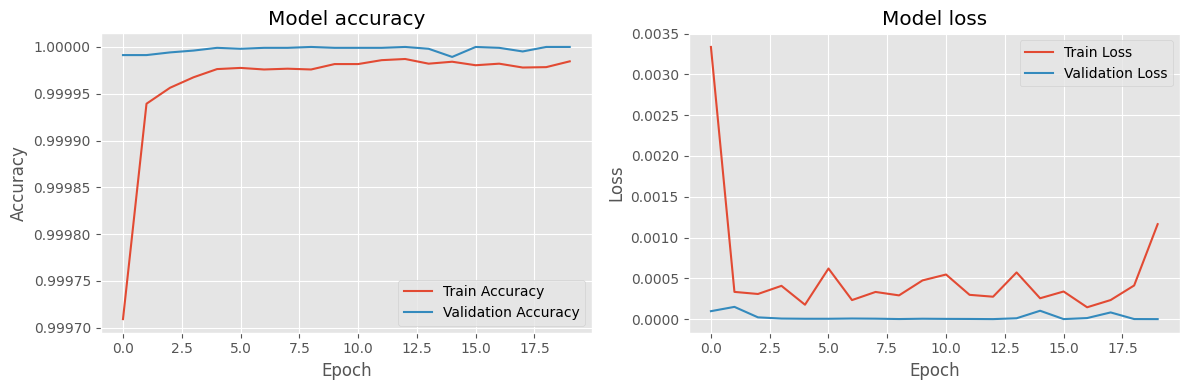

46051/46051 ━━━━━━━━━━━━━━━━━━━━ 77s 2ms/step - accuracy: 1.0000 - loss: 0.0022
Test Loss: 0.0023414725437760353
Test Accuracy: 0.9999986290931702
46051/46051 ━━━━━━━━━━━━━━━━━━━━ 78s 2ms/step
Accuracy on test set: 0.9999986427851135


In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, Input
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def create_cnn_model(input_shape=(20, 1)):
    model = Sequential([
        Input(shape=input_shape),
        Conv1D(32, 3, activation='relu'),
        Dropout(0.5),
        Conv1D(64, 3, activation='relu'),
        Dropout(0.5),
        Conv1D(64, 3, activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

def plot_metrics(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Assuming X_train_20features_std, X_test_20features_std, y_train_20features, y_test_20features are defined

# Create the CNN model
model = create_cnn_model()

# Display model summary
model.summary()

# Reshape the data for CNN input
X_train_reshaped = X_train_20features_std.reshape(-1, 20, 1)
X_test_reshaped = X_test_20features_std.reshape(-1, 20, 1)

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train_20features, epochs=20, batch_size=256,
                    validation_split=0.3)

# Plot accuracy and loss graphs
plot_metrics(history)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test_20features)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# Make predictions
y_pred = (model.predict(X_test_reshaped) > 0.5).astype("int32")

# Calculate accuracy on test set
test_accuracy = accuracy_score(y_test_20features, y_pred)
print(f'Accuracy on test set: {test_accuracy}')

In [34]:
model.save('CNN model for DDOS.h5')

46051/46051 ━━━━━━━━━━━━━━━━━━━━ 96s 2ms/step


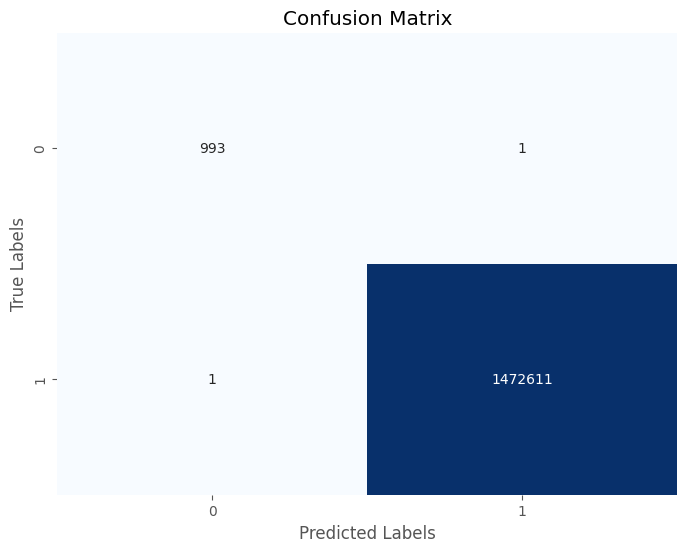

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = (model.predict(X_test_reshaped) > 0.5).astype("int32")

cm = confusion_matrix(y_test_20features, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test_20features, y_pred)
recall = recall_score(y_test_20features, y_pred)
f1 = f1_score(y_test_20features, y_pred)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Precision: 0.9999993209345027
Recall: 0.9999993209345027
F1 Score: 0.9999993209345027


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test_20features, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       994
           1       1.00      1.00      1.00   1472612

    accuracy                           1.00   1473606
   macro avg       1.00      1.00      1.00   1473606
weighted avg       1.00      1.00      1.00   1473606



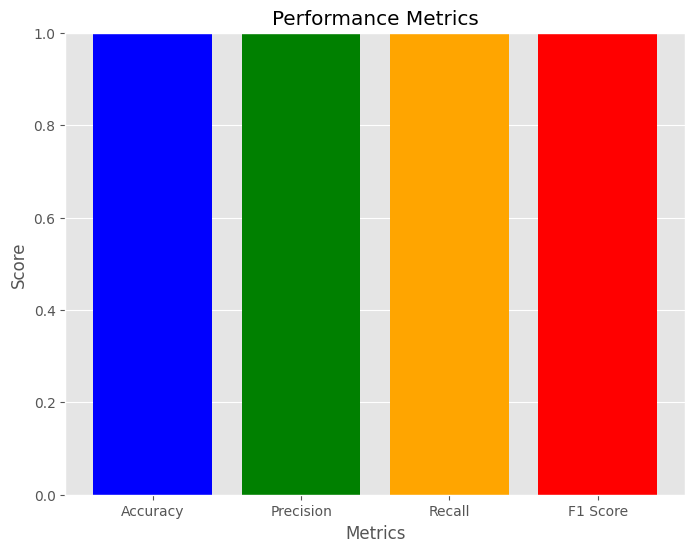

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Assuming you have already calculated y_pred

# Calculate performance metrics
precision = precision_score(y_test_20features, y_pred)
recall = recall_score(y_test_20features, y_pred)
f1 = f1_score(y_test_20features, y_pred)
accuracy = accuracy_score(y_test_20features, y_pred)

# Plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.title('Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Limit y-axis from 0 to 1
plt.show()


30701/30701 ━━━━━━━━━━━━━━━━━━━━ 76s 2ms/step - accuracy: 1.0000 - loss: 1.4975e-06


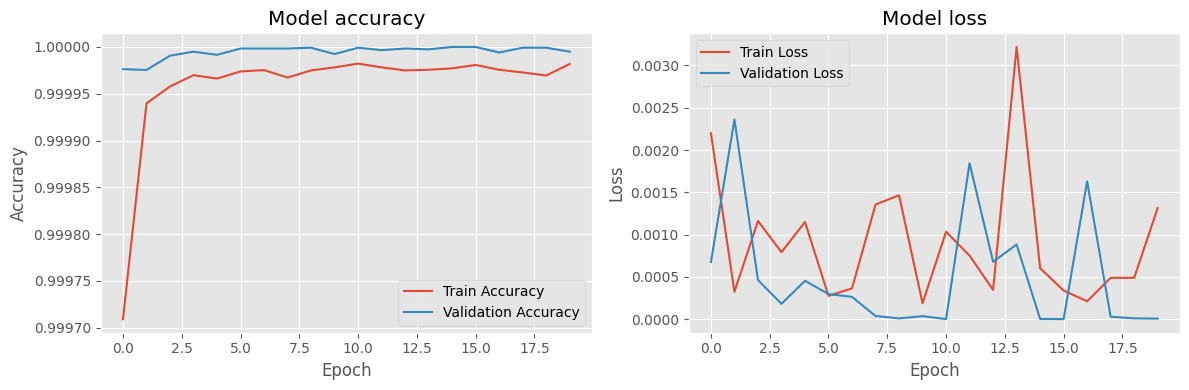

30701/30701 ━━━━━━━━━━━━━━━━━━━━ 55s 2ms/step - accuracy: 1.0000 - loss: 3.8850e-05


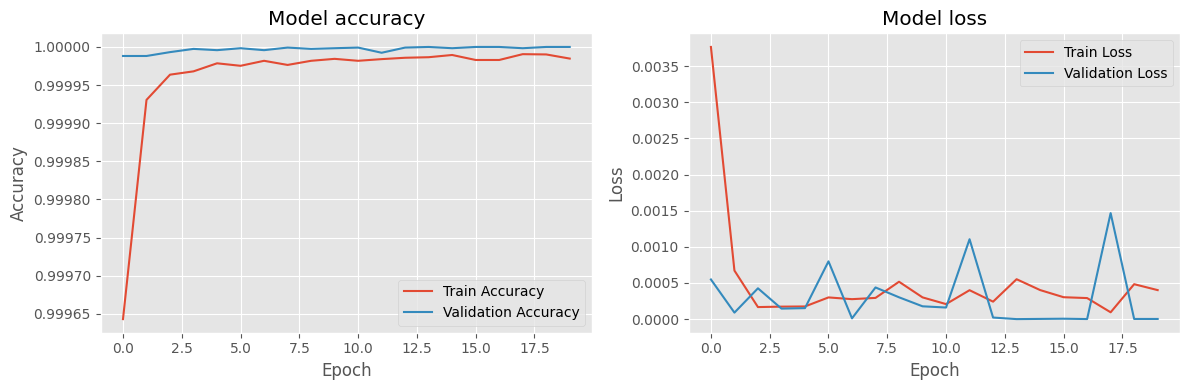

30701/30701 ━━━━━━━━━━━━━━━━━━━━ 55s 2ms/step - accuracy: 1.0000 - loss: 1.6236e-04


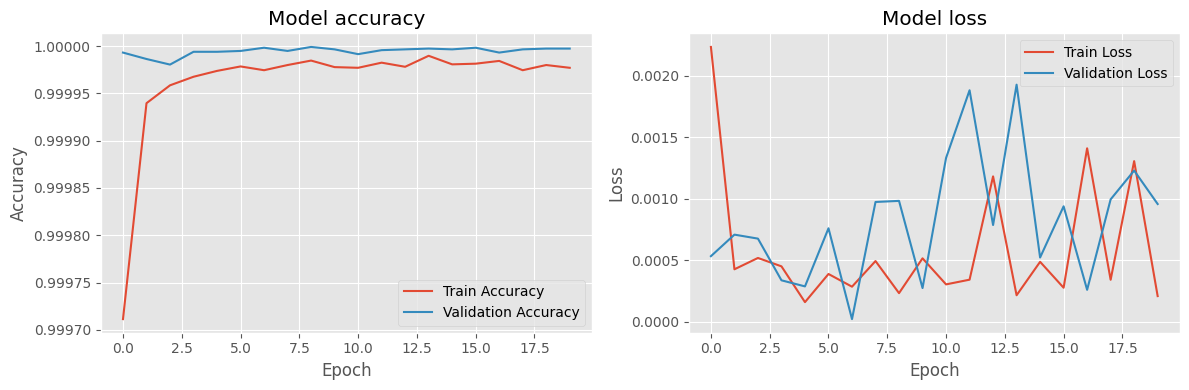

30701/30701 ━━━━━━━━━━━━━━━━━━━━ 67s 2ms/step - accuracy: 1.0000 - loss: 0.0070


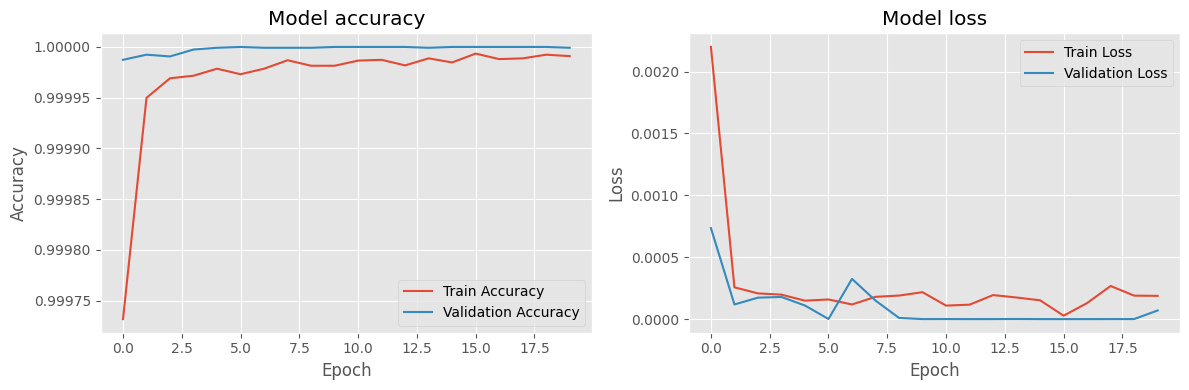

30701/30701 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - accuracy: 1.0000 - loss: 2.4438e-07


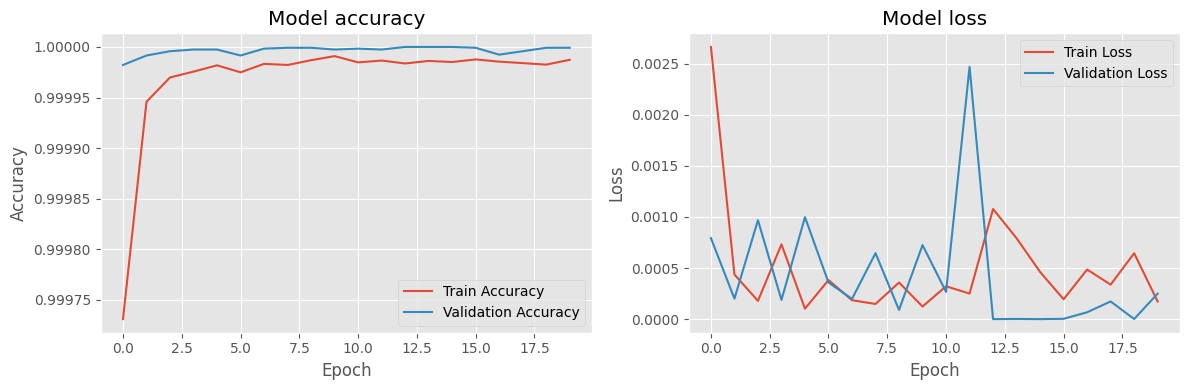

Average Accuracy: 0.9999981760978699
Average Loss: 0.002133306880728014


In [39]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

# Define the number of folds for cross-validation
n_splits = 5

# Define the input data and labels for cross-validation
X_data = np.concatenate((X_train_reshaped, X_test_reshaped), axis=0)
y_labels = np.concatenate((y_train_20features, y_test_20features), axis=0)

# Initialize StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store accuracy and loss for each fold
accuracies = []
losses = []

# Perform cross-validation
for train_index, test_index in skf.split(X_data, y_labels):
    X_train_fold, X_test_fold = X_data[train_index], X_data[test_index]
    y_train_fold, y_test_fold = y_labels[train_index], y_labels[test_index]

    # Create and compile the model
    model = create_cnn_model()

    # Train the model
    history = model.fit(X_train_fold, y_train_fold, epochs=20, batch_size=256, validation_split=0.3, verbose=0)

    # Evaluate the model on test fold
    loss, accuracy = model.evaluate(X_test_fold, y_test_fold)
    accuracies.append(accuracy)
    losses.append(loss)

    # Plot accuracy and loss graphs for each fold (optional)
    plot_metrics(history)

# Calculate and print average accuracy and loss across all folds
average_accuracy = np.mean(accuracies)
average_loss = np.mean(losses)
print(f'Average Accuracy: {average_accuracy}')
print(f'Average Loss: {average_loss}')

 
 

In [40]:
import numpy as np

def predict(input_data, model, ss20):

    input_data_std = ss20.transform(input_data)
    # Reshape the data for CNN input
    input_data_reshaped = input_data_std.reshape(-1, 20, 1)
    # Make predictions
    predictions = (model.predict(input_data_reshaped) > 0.5).astype("int64")
    # Flatten predictions to 1D array
    return predictions.flatten()

# Input your own data here in the correct format
new_data = np.array([
    [4075870, 76, 59147, 135, 443, 6, 102, 10752566, 5, 6, 4, 62, 1, 0, 0.8, 0.447213595, 31, 0, 10.33333333, 16.00833116],
    [4075873, 76, 59104, 141, 80, 6, 106, 116700629, 28, 28, 904, 1576, 440, 0, 32.28571429, 115.1549221, 788, 0, 56.28571429, 206.6650282],
    [4075865, 76, 59160, 125, 443, 6, 107, 40071270, 9, 10, 8, 62, 1, 0, 0.888888889, 0.333333333, 31, 0, 6.2, 13.07074766],    
    [4075515, 76, 59166, 88, 443, 6, 109, 95301325, 22, 20, 73, 0, 53, 0, 3.318181818, 11.09863296, 0, 0, 0, 0],
    [4075866, 76, 59165, 125, 443, 6, 110, 40022787, 9, 10, 8, 62, 1, 0, 0.888888889, 0.333333333, 31, 0, 6.2, 13.07074766],
    [1204062, 14, 634, 74, 14729, 17, 111, 92365, 200, 0, 88000, 0, 440, 440, 440, 0, 0, 0, 0, 0],
    [4075956, 76, 59153, 149, 443, 6, 112, 119743393, 37, 42, 17768, 2628, 3036, 0, 480.2162162, 925.7602022, 438, 0, 62.57142857, 155.1259351]
])
# Get predictions
predicted_labels = predict(new_data, model, ss20)
print("Predicted labels:", predicted_labels)


i:\WAF with mechine learning\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
Predicted labels: [0 0 0 0 0 1 0]
